# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from numpy import arange
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
from ema_workbench.analysis.prim_util import PRIMObjectiveFunctions

# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [4]:
%matplotlib inline

ema_logging.log_to_stderr(ema_logging.INFO)

file = "data/Bryant et al 2010.csv"

data = pd.read_csv(file, index_col=False)

x = data.iloc[:, 2:11]
y = data.iloc[:, 15].values

prim_obj_orig = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
prim_obj_leni1 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.LENIENT1)
prim_obj_leni2 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.LENIENT2)

box_orig = prim_obj_orig.find_box()
box_leni1 = prim_obj_leni1.find_box()
box_leni2 = prim_obj_leni2.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0011337868480725624, coverage: 0.011235955056179775, density: 1.0 restricted_dimensions: 6
[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6
[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 0.972972972972973, mass: 0.04195011337868481, coverage: 0.4044943820224719, density: 0.972972972972973 restricted_dimensions: 5


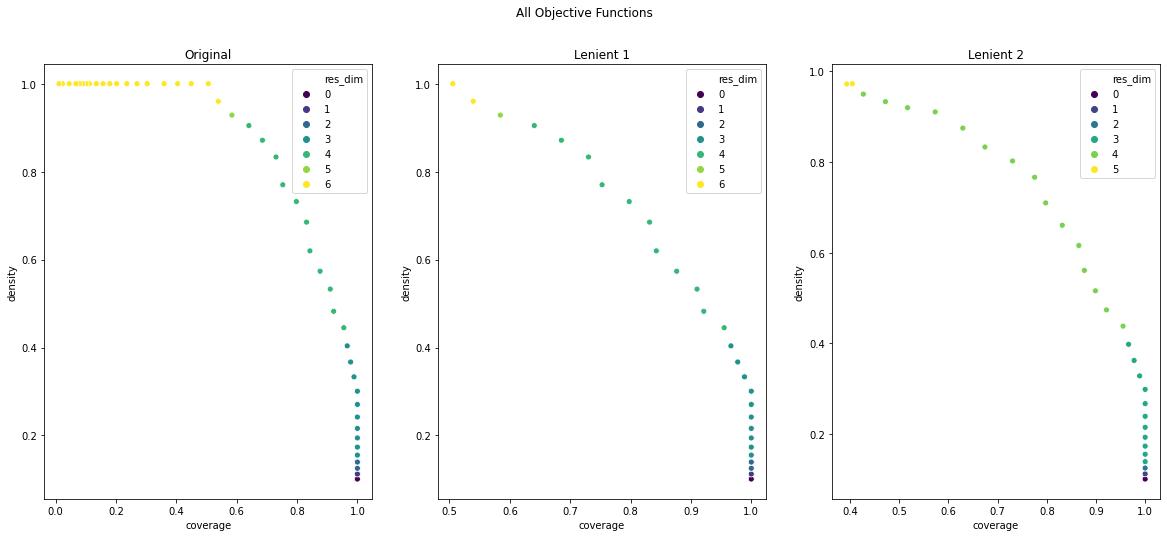

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('All Objective Functions')

sns.scatterplot(ax=axes[0], x=box_orig.peeling_trajectory['coverage'], y=box_orig.peeling_trajectory['density'], hue=box_orig.peeling_trajectory['res_dim'], palette='viridis', legend='full')
axes[0].set_title('Original');
sns.scatterplot(ax=axes[1], x=box_leni1.peeling_trajectory['coverage'], y=box_leni1.peeling_trajectory['density'], hue=box_leni1.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Lenient 1');
sns.scatterplot(ax=axes[2], x=box_leni2.peeling_trajectory['coverage'], y=box_leni2.peeling_trajectory['density'], hue=box_leni2.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[2].set_title('Lenient 2');


coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



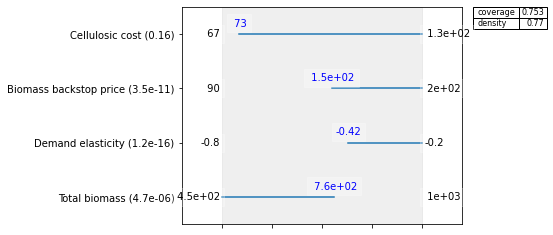

In [6]:
# 21st box with orginal prim algorithm
box_orig.inspect(21)
box_orig.inspect(21,style='graph')
plt.show()

coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



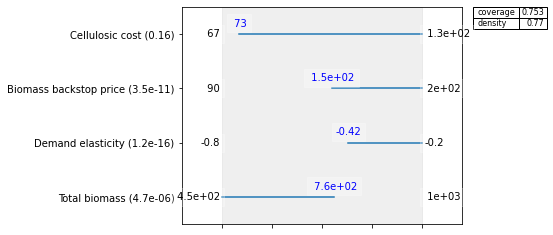

In [7]:
# 21st box with lenient1 prim algorithm
box_leni1.inspect(21)
box_leni1.inspect(21, style="graph")
plt.show()

coverage    0.775281
density     0.766667
id                21
mass        0.102041
mean        0.766667
res_dim            4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  761.299988  [-1.0, 5.5712149381386965e-06]
Demand elasticity        -0.424500   -0.202000  [1.6272130725685678e-17, -1.0]
Biomass backstop price  148.300003  199.600006   [1.070391561937911e-11, -1.0]
Cellulosic cost          72.650002  133.699997       [0.162785284081502, -1.0]



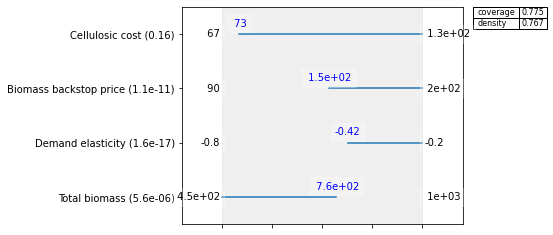

In [8]:
# 21st box with lenient2 prim algorithm
box_leni2.inspect(21)
box_leni2.inspect(21, style="graph")
plt.show()

coverage      0.011236
density              1
id                  45
mass        0.00113379
mean                 1
res_dim              6
Name: 45, dtype: object

                            box 45                         
                               min         max    qp values
Total biomass           450.000000  755.799988  [-1.0, 1.0]
Cellulosic yield         80.000000   97.299999  [-1.0, 1.0]
oil supply shift         -0.100000    0.080500  [-1.0, 1.0]
Cellulosic cost          72.650002   73.449997   [0.5, 1.0]
Demand elasticity        -0.384500   -0.202000  [1.0, -1.0]
Biomass backstop price  162.150002  199.600006  [1.0, -1.0]



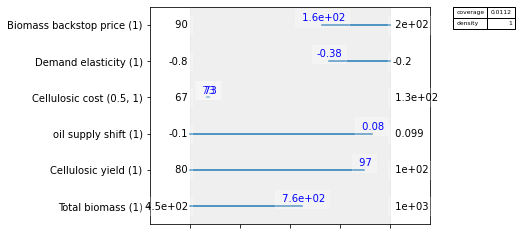

In [9]:
# last box with orginal prim algorithm
box_orig.inspect()
box_orig.inspect(style='graph')
plt.show()

coverage     0.505618
density             1
id                 27
mass        0.0510204
mean                1
res_dim             6
Name: 27, dtype: object

                            box 27                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988  [-1.0, 2.3170025284776066e-07]
oil supply shift         -0.100000    0.080500      [-1.0, 0.1533133614558316]
Cellulosic yield         80.000000   97.299999     [-1.0, 0.15929622601339163]
Demand elasticity        -0.384500   -0.202000   [1.707566113939849e-16, -1.0]
Biomass backstop price  162.150002  199.600006   [2.842170943040401e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.14731492322805617, -1.0]



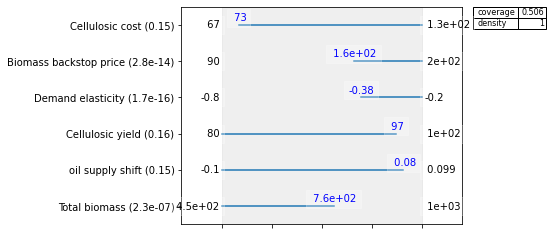

In [10]:
# last box with lenient1 prim algorithm
box_leni1.inspect()
box_leni1.inspect(style='graph')
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [8]:
file = "data/Rozenberg et al 2014.csv"
data = pd.read_csv(file)

In [9]:
def make_comparison_plot(original_box, lenient_box):
    """
    3
    plot the tradeoff curves for both the original criterion
    and the lenient criterion. Those that are the same are
    shown in green.
    """
    colors = sns.color_palette()
    
    # Arrays of the lenient box for the scatter plot
    len_coverage = np.asarray(lenient_box.peeling_trajectory['coverage'])
    len_density = np.asarray(lenient_box.peeling_trajectory['density'])
    
    # Arrays of the original box for the scatter plot
    orig_coverage = np.asarray(original_box.peeling_trajectory['coverage'])
    orig_density = np.asarray(original_box.peeling_trajectory['density'])
    
    # Check for coverage values where original and lenient are the same
    logical = np.isclose(len_coverage, orig_coverage[0:len_coverage.shape[0]])
    same_coverage = len_coverage[logical]
    
    # Check for density values where original and lenient are the same
    logical = np.isclose(len_density, orig_density[0:len_density.shape[0]])
    same_density = len_density[logical]
    
    # Create figure
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    # Create scatters in the plot
    ax.scatter(orig_coverage, orig_density, label='original', color=colors[0], s=40, marker='d')
    ax.scatter(len_coverage, len_density, label='lenient', color=colors[2], s=40, marker='*')
    ax.scatter(same_coverage, same_density, label='same', color=colors[1], s=40, marker='o')
    
    # Location of legend bottom left because of SSP4 results
    ax.legend(loc=3)
    ax.set_xlabel('coverage')
    ax.set_ylabel('density')
    return fig

## SSP 1

In [10]:
x1 = data.iloc[:, 0:7]
y1 = data.iloc[:, 7].values

#play with a high and low threshold
ssp1_prim_obj_orig = prim.Prim(x1, y1, threshold=0.16, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp1_prim_obj_orig_high = prim.Prim(x1, y1, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp1_prim_obj_leni1 = prim.Prim(x1, y1, threshold=0.16, peel_alpha=0.1, mass_min=0.001)
ssp1_prim_obj_leni1_high = prim.Prim(x1, y1, threshold=0.8, peel_alpha=0.1, mass_min=0.001)


ssp1_box_orig = ssp1_prim_obj_orig.find_box()
ssp1_box_orig_high = ssp1_prim_obj_orig_high.find_box()
ssp1_box_leni1 = ssp1_prim_obj_leni1.find_box()
ssp1_box_leni1_high = ssp1_prim_obj_leni1_high.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.022727272727272728, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.022727272727272728, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


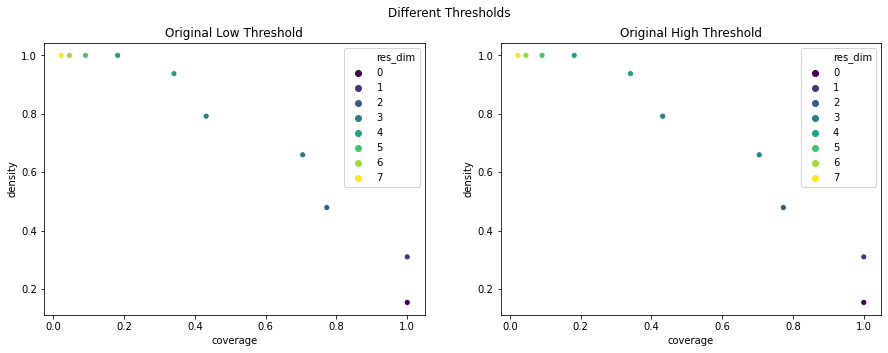

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp1_box_orig.peeling_trajectory['coverage'], y=ssp1_box_orig.peeling_trajectory['density'], hue=ssp1_box_orig.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[0].set_title('Original Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp1_box_orig_high.peeling_trajectory['coverage'], y=ssp1_box_orig_high.peeling_trajectory['density'], hue=ssp1_box_orig_high.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Original High Threshold');

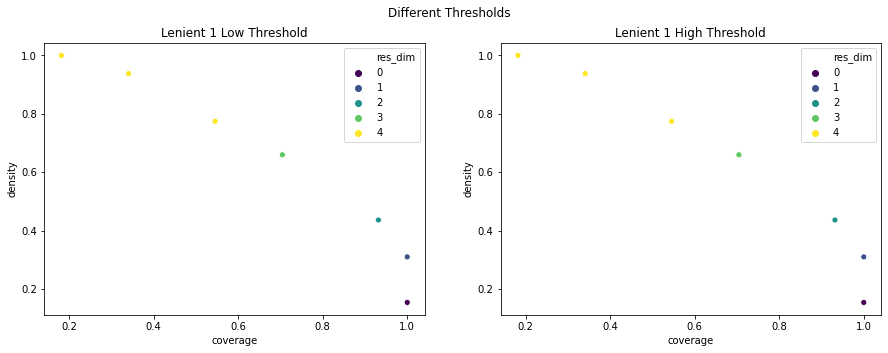

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp1_box_leni1.peeling_trajectory['coverage'], y=ssp1_box_leni1.peeling_trajectory['density'], hue=ssp1_box_leni1.peeling_trajectory['res_dim'],palette='viridis',legend='full')
axes[0].set_title('Lenient 1 Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp1_box_leni1_high.peeling_trajectory['coverage'], y=ssp1_box_leni1_high.peeling_trajectory['density'], hue=ssp1_box_leni1_high.peeling_trajectory['res_dim'],palette='viridis',legend='full')
axes[1].set_title('Lenient 1 High Threshold');

No significant difference in threshold

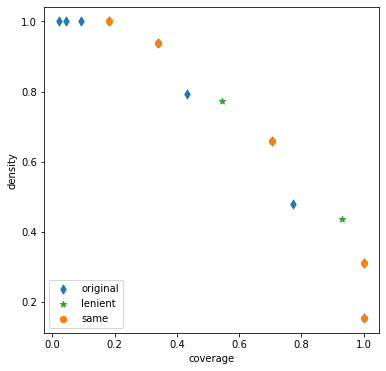

In [15]:
make_comparison_plot(ssp1_box_orig, ssp1_box_leni1)
plt.show()

In [16]:
ssp1_box_leni1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.153846,0,1.000000,0.153846,0
1,1.000000,0.309859,1,0.496503,0.309859,1
2,0.931818,0.436170,2,0.328671,0.436170,2
3,0.704545,0.659574,3,0.164336,0.659574,3
4,0.545455,0.774194,4,0.108392,0.774194,4
5,0.340909,0.937500,5,0.055944,0.937500,4
6,0.181818,1.000000,6,0.027972,1.000000,4


In [17]:
ssp1_box_leni1.inspect(3)

coverage    0.704545
density     0.659574
id                 3
mass        0.164336
mean        0.659574
res_dim            3
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
population     0.0  1.0   [-1.0, 0.005972420192480504]
behaviors      1.0  1.0  [1.469768735781625e-06, -1.0]
inequalities   1.0  1.0   [0.000977219127931685, -1.0]



## SSP2

In [19]:
x2 = data.iloc[:, 0:7]
y2 = data.iloc[:, 8].values

ssp2_prim_obj_orig = prim.Prim(x2, y2, threshold=0.16, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp2_prim_obj_orig_high = prim.Prim(x2, y2, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp2_prim_obj_leni1 = prim.Prim(x2, y2, threshold=0.16, peel_alpha=0.1, mass_min=0.001)
ssp2_prim_obj_leni1_high = prim.Prim(x2, y2, threshold=0.8, peel_alpha=0.1, mass_min=0.001)
                                                       
ssp2_box_orig = ssp2_prim_obj_orig.find_box()
ssp2_box_orig_high = ssp2_prim_obj_orig_high.find_box()
ssp2_box_leni1 = ssp2_prim_obj_leni1.find_box()
ssp2_box_leni1_high = ssp2_prim_obj_leni1_high.find_box()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.03571428571428571, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.03571428571428571, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.013986013986013986, coverage: 0.14285714285714285, density: 1.0 restricted_dimensions: 5
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.013986013986013986, coverage: 0.14285714285714285, density: 1.0 restricted_dimensions: 5


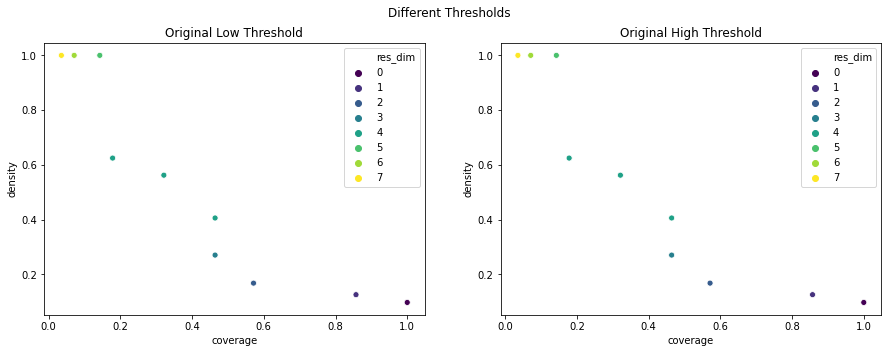

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp2_box_orig.peeling_trajectory['coverage'], y=ssp2_box_orig.peeling_trajectory['density'], hue=ssp2_box_orig.peeling_trajectory['res_dim'], palette='viridis', legend='full')
axes[0].set_title('Original Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp2_box_orig_high.peeling_trajectory['coverage'], y=ssp2_box_orig_high.peeling_trajectory['density'], hue=ssp2_box_orig_high.peeling_trajectory['res_dim'], palette='viridis', legend='full' )
axes[1].set_title('Original High Threshold');

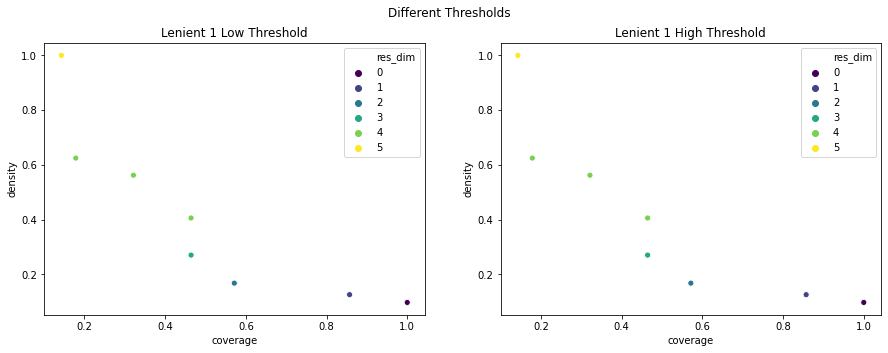

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp2_box_leni1.peeling_trajectory['coverage'], y=ssp2_box_leni1.peeling_trajectory['density'], hue=ssp2_box_leni1.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[0].set_title('Lenient 1 Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp2_box_leni1_high.peeling_trajectory['coverage'], y=ssp2_box_leni1_high.peeling_trajectory['density'], hue=ssp2_box_leni1_high.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Lenient 1 High Threshold');

No significant differences in threshold

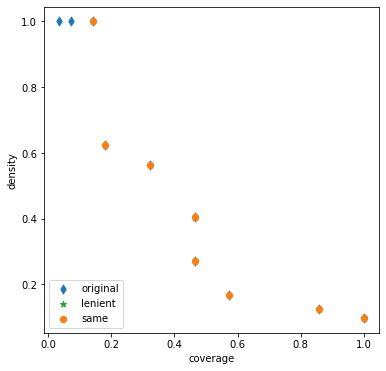

In [60]:
make_comparison_plot(ssp2_box_orig, ssp2_box_leni1)
plt.show()

In [61]:
ssp2_box_leni1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.097902,0,1.000000,0.097902,0
1,0.857143,0.126316,1,0.664336,0.126316,1
2,0.571429,0.168421,2,0.332168,0.168421,2
3,0.464286,0.270833,3,0.167832,0.270833,3
4,0.464286,0.406250,4,0.111888,0.406250,4
5,0.321429,0.562500,5,0.055944,0.562500,4
6,0.178571,0.625000,6,0.027972,0.625000,4
7,0.142857,1.000000,7,0.013986,1.000000,5


In [38]:
ssp2_box_leni1.inspect(4)

coverage    0.464286
density      0.40625
id                 4
mass        0.111888
mean         0.40625
res_dim            4
Name: 4, dtype: object

             box 4                                   
               min  max                     qp values
behaviors      0.0  0.0  [-1.0, 0.007952250065964422]
convergence    0.0  1.0   [-1.0, 0.06752777747436578]
population     0.0  1.0   [-1.0, 0.06752777747436578]
inequalities   1.0  1.0   [0.02290405000582007, -1.0]



## SSP 3

In [22]:
x3 = data.iloc[:, 0:7]
y3 = data.iloc[:, 9].values

ssp3_prim_obj_orig = prim.Prim(x3, y3, threshold=0.16, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp3_prim_obj_leni1 = prim.Prim(x3, y3, threshold=0.16, peel_alpha=0.1, mass_min=0.001)
ssp3_prim_obj_orig_high = prim.Prim(x3, y3, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp3_prim_obj_leni1_high = prim.Prim(x3, y3, threshold=0.8, peel_alpha=0.1, mass_min=0.001)

ssp3_box_orig = ssp3_prim_obj_orig.find_box()
ssp3_box_leni1 = ssp3_prim_obj_leni1.find_box()
ssp3_box_orig_high = ssp3_prim_obj_orig_high.find_box()
ssp3_box_leni1_high = ssp3_prim_obj_leni1_high.find_box()

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.025, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.04195804195804196, coverage: 0.3, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.025, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.04195804195804196, coverage: 0.3, density: 1.0 restricted_dimensions: 4


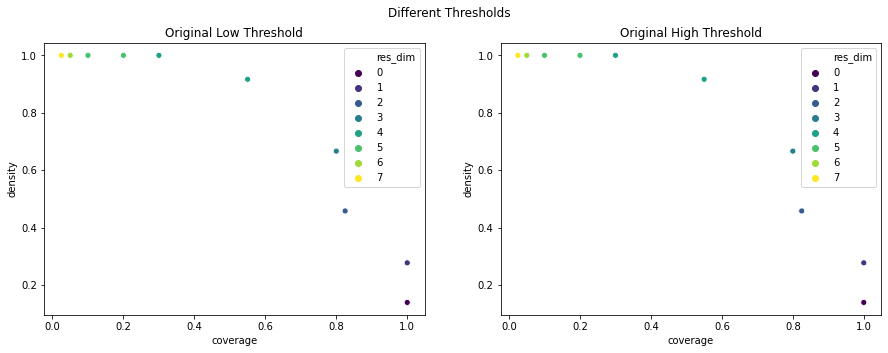

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp3_box_orig.peeling_trajectory['coverage'], y=ssp3_box_orig.peeling_trajectory['density'], hue=ssp3_box_orig.peeling_trajectory['res_dim'], palette='viridis', legend='full')
axes[0].set_title('Original Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp3_box_orig_high.peeling_trajectory['coverage'], y=ssp3_box_orig_high.peeling_trajectory['density'], hue=ssp3_box_orig_high.peeling_trajectory['res_dim'], palette='viridis', legend='full')
axes[1].set_title('Original High Threshold');

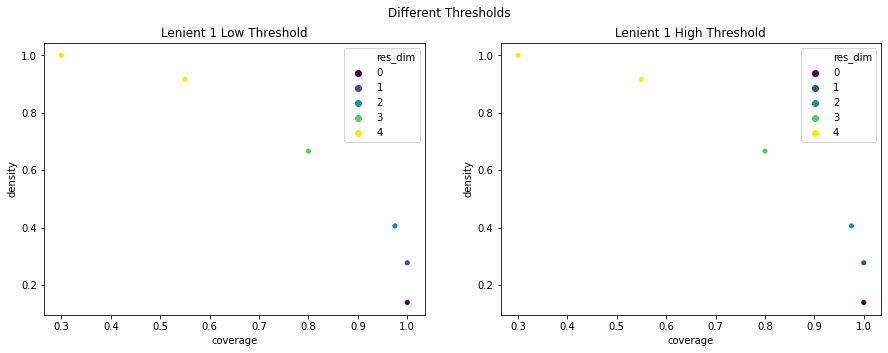

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp3_box_leni1.peeling_trajectory['coverage'], y=ssp3_box_leni1.peeling_trajectory['density'], hue=ssp3_box_leni1.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[0].set_title('Lenient 1 Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp3_box_leni1_high.peeling_trajectory['coverage'], y=ssp3_box_leni1_high.peeling_trajectory['density'], hue=ssp3_box_leni1_high.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Lenient 1 High Threshold');

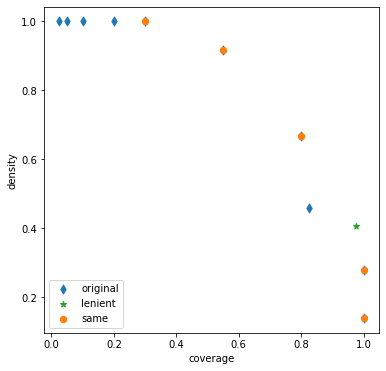

In [27]:
make_comparison_plot(ssp3_box_orig, ssp3_box_leni1)
plt.show()

In [28]:
ssp3_box_leni1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000,0.139860,0,1.000000,0.139860,0
1,1.000,0.277778,1,0.503497,0.277778,1
2,0.975,0.406250,2,0.335664,0.406250,2
3,0.800,0.666667,3,0.167832,0.666667,3
4,0.550,0.916667,4,0.083916,0.916667,4
5,0.300,1.000000,5,0.041958,1.000000,4


In [29]:
ssp3_box_leni1.inspect(3)

coverage         0.8
density     0.666667
id                 3
mass        0.167832
mean        0.666667
res_dim            3
Name: 3, dtype: object

             box 3                                     
               min  max                       qp values
behaviors      0.0  0.0   [-1.0, 3.130396509639097e-06]
inequalities   0.0  0.0  [-1.0, 0.00023925686322256464]
population     1.0  2.0    [0.002914918307607955, -1.0]



## SSP4

In [30]:
x4 = data.iloc[:, 0:7]
y4 = data.iloc[:, 10].values


ssp4_prim_obj_orig = prim.Prim(x4, y4, threshold=0.16, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp4_prim_obj_leni1 = prim.Prim(x4, y4, threshold=0.16, peel_alpha=0.1, mass_min=0.001)
ssp4_prim_obj_orig_high = prim.Prim(x4, y4, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp4_prim_obj_leni1_high = prim.Prim(x4, y4, threshold=0.8, peel_alpha=0.1, mass_min=0.001)

ssp4_box_orig = ssp4_prim_obj_orig.find_box()
ssp4_box_leni1 = ssp4_prim_obj_leni1.find_box()
ssp4_box_orig_high = ssp4_prim_obj_orig.find_box()
ssp4_box_leni1_high = ssp4_prim_obj_leni1.find_box()

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.043478260869565216, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 285 points remaining, containing 22 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.043478260869565216, density: 1.0 restricted_dimensions: 6
[MainProcess/INFO] 270 points remaining, containing 7 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.013986013986013986, coverage: 0.17391304347826086, density: 1.0 restricted_dimensions: 4


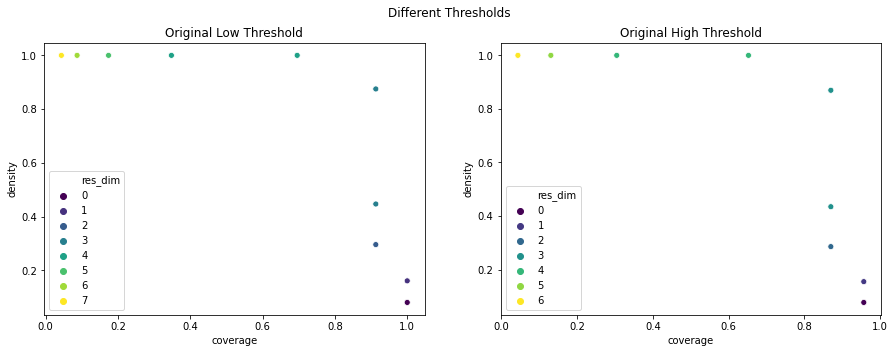

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp4_box_orig.peeling_trajectory['coverage'], y=ssp4_box_orig.peeling_trajectory['density'], hue=ssp4_box_orig.peeling_trajectory['res_dim'], palette='viridis', legend='full')
axes[0].set_title('Original Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp4_box_orig_high.peeling_trajectory['coverage'], y=ssp4_box_orig_high.peeling_trajectory['density'], hue=ssp4_box_orig_high.peeling_trajectory['res_dim'], palette='viridis',legend='full')
axes[1].set_title('Original High Threshold');

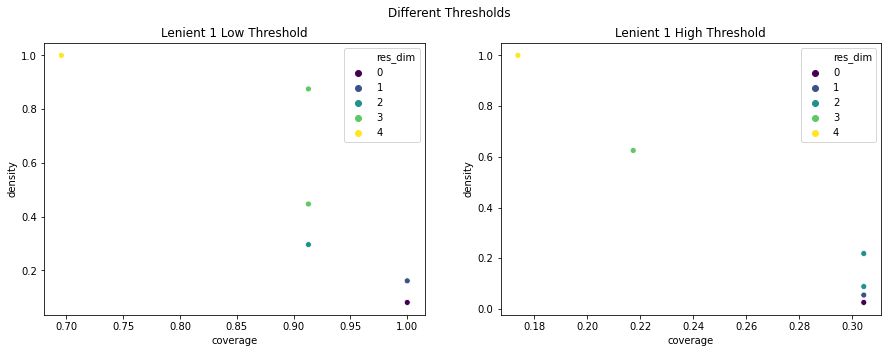

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp4_box_leni1.peeling_trajectory['coverage'], y=ssp4_box_leni1.peeling_trajectory['density'], hue=ssp4_box_leni1.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[0].set_title('Lenient 1 Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp4_box_leni1_high.peeling_trajectory['coverage'], y=ssp4_box_leni1_high.peeling_trajectory['density'], hue=ssp4_box_leni1_high.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Lenient 1 High Threshold');

Significant differences in threshold. Hence, we will fine tune the lenient objective function to find a treshold that provides a better density-coverage tradeoff

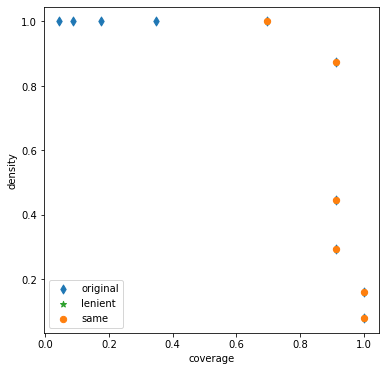

In [31]:
make_comparison_plot(ssp4_box_orig, ssp4_box_leni1)
plt.show()

In [69]:
ssp4_box_leni1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.080420,0,1.000000,0.080420,0
1,1.000000,0.160839,1,0.500000,0.160839,1
2,0.913043,0.295775,2,0.248252,0.295775,2
3,0.913043,0.446809,3,0.164336,0.446809,3
4,0.913043,0.875000,4,0.083916,0.875000,3
5,0.695652,1.000000,5,0.055944,1.000000,4


In [70]:
ssp4_box_leni1.inspect(4)

coverage    0.913043
density        0.875
id                 4
mass        0.083916
mean           0.875
res_dim            3
Name: 4, dtype: object

             box 4                                     
               min  max                       qp values
convergence    0.0  0.0  [-1.0, 5.8154822275538926e-09]
inequalities   0.0  0.0  [-1.0, 1.1582287777091569e-05]
behaviors      1.0  1.0   [6.336598320679067e-05, -1.0]



## SSP5

In [77]:
x5 = data.iloc[:, 0:7]
y5 = data.iloc[:, 11].values


ssp5_prim_obj_orig = prim.Prim(x5, y5, threshold=0.16, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp5_prim_obj_leni1 = prim.Prim(x5, y5, threshold=0.16, peel_alpha=0.1, mass_min=0.001)
ssp5_prim_obj_orig_high = prim.Prim(x5, y5, threshold=0.8, peel_alpha=0.1, mass_min=0.001, obj_function=PRIMObjectiveFunctions.ORIGINAL)
ssp5_prim_obj_leni1_high = prim.Prim(x5, y5, threshold=0.8, peel_alpha=0.1, mass_min=0.001)

ssp5_box_orig = ssp5_prim_obj_orig.find_box()
ssp5_box_leni1 = ssp5_prim_obj_leni1.find_box()
ssp5_box_orig_high = ssp5_prim_obj_orig_high.find_box()
ssp5_box_leni1_high = ssp5_prim_obj_leni1_high.find_box()

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.05263157894736842, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.013986013986013986, coverage: 0.21052631578947367, density: 1.0 restricted_dimensions: 5
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0034965034965034965, coverage: 0.05263157894736842, density: 1.0 restricted_dimensions: 7
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.013986013986013986, coverage: 0.21052631578947367, density: 1.0 restricted_dimensions: 5


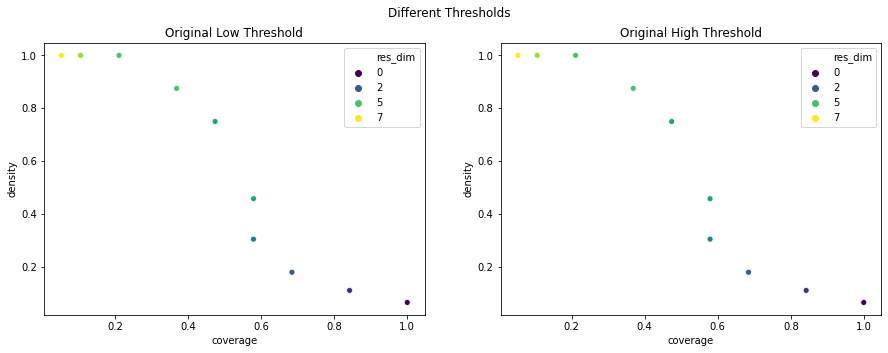

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp5_box_orig.peeling_trajectory['coverage'], y=ssp5_box_orig.peeling_trajectory['density'], hue=ssp5_box_orig.peeling_trajectory['res_dim'], palette='viridis')
axes[0].set_title('Original Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp5_box_orig_high.peeling_trajectory['coverage'], y=ssp5_box_orig_high.peeling_trajectory['density'], hue=ssp5_box_orig_high.peeling_trajectory['res_dim'], palette='viridis')
axes[1].set_title('Original High Threshold');

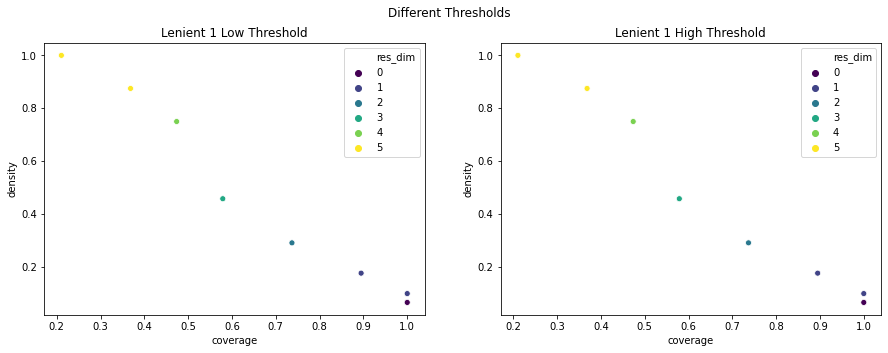

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Different Thresholds')

sns.scatterplot(ax=axes[0], x=ssp5_box_leni1.peeling_trajectory['coverage'], y=ssp5_box_leni1.peeling_trajectory['density'], hue=ssp5_box_leni1.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[0].set_title('Lenient 1 Low Threshold');
sns.scatterplot(ax=axes[1], x=ssp5_box_leni1_high.peeling_trajectory['coverage'], y=ssp5_box_leni1_high.peeling_trajectory['density'], hue=ssp5_box_leni1_high.peeling_trajectory['res_dim'],palette='viridis', legend='full')
axes[1].set_title('Lenient 1 High Threshold');

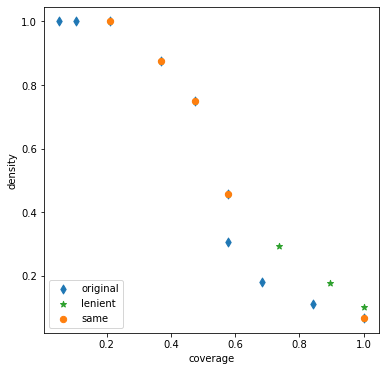

In [114]:
make_comparison_plot(ssp5_box_orig, ssp5_box_leni1)
plt.show()

In [73]:
ssp5_box_leni1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.066434,0,1.000000,0.066434,0
1,1.000000,0.100000,1,0.664336,0.100000,1
2,0.894737,0.177083,2,0.335664,0.177083,1
3,0.736842,0.291667,3,0.167832,0.291667,2
4,0.578947,0.458333,4,0.083916,0.458333,3
5,0.473684,0.750000,5,0.041958,0.750000,4
6,0.368421,0.875000,6,0.027972,0.875000,5
7,0.210526,1.000000,7,0.013986,1.000000,5


In [74]:
ssp5_box_leni1.inspect(5)

coverage    0.473684
density         0.75
id                 5
mass        0.041958
mean            0.75
res_dim            4
Name: 5, dtype: object

                box 5                                   
                  min  max                     qp values
behaviors         0.0  0.0   [-1.0, 0.04043344665723633]
capital markets   0.0  0.0   [-1.0, 0.04043344665723633]
convergence       2.0  2.0  [0.001955118261006239, -1.0]
inequalities      1.0  1.0  [0.009456905696424656, -1.0]



# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [123]:
from ema_workbench import load_results

file = "data/Hamarat et al 2013.gz"

x, outcomes = load_results(file)


In [124]:
x[0:5]

,SWITCH Market price determination,SWITCH TGC obligation curve,SWITCH carbon cap,SWITCH carbon price determination,SWITCH economic growth,SWITCH electrification rate,SWITCH interconnection capacity expansion,SWITCH lookup curve TGC,SWITCH low reserve margin price markup,SWITCH physical limits,...,starting construction time,time of nuclear power plant ban,uncertainty initial gross fuel costs,weight factor carbon abatement,weight factor marginal investment costs,weight factor technological familiarity,weight factor technological growth potential,year,model,policy
0,1,2,3,2,5,1,1,2,1,2,...,0.813530,2045.490971,0.906060,8.761673,8.859864,4.240532,5.476591,0.939007,energy,no policy
1,2,3,2,1,4,2,1,1,3,2,...,1.712138,2088.839530,0.741120,4.573769,4.300891,4.159390,9.782508,0.964794,energy,no policy
2,1,3,1,1,3,6,4,2,4,1,...,0.390609,2013.876882,1.396959,9.374337,1.586548,2.431839,1.282010,1.070390,energy,no policy
3,2,2,3,2,1,5,1,2,2,1,...,2.069449,2042.566070,1.034850,3.912941,8.038037,1.170614,4.865733,0.979062,energy,no policy
4,1,2,3,3,4,5,1,2,2,1,...,1.094902,2051.277387,0.590479,3.663262,8.602380,7.392188,2.125345,1.073439,energy,no policy


In [125]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   SWITCH Market price determination             5000 non-null   category
 1   SWITCH TGC obligation curve                   5000 non-null   category
 2   SWITCH carbon cap                             5000 non-null   category
 3   SWITCH carbon price determination             5000 non-null   category
 4   SWITCH economic growth                        5000 non-null   category
 5   SWITCH electrification rate                   5000 non-null   category
 6   SWITCH interconnection capacity expansion     5000 non-null   category
 7   SWITCH lookup curve TGC                       5000 non-null   category
 8   SWITCH low reserve margin price markup        5000 non-null   category
 9   SWITCH physical limits                        5000 n

In [126]:
x.iloc[:,0:12] = x.iloc[:,0:12].apply(pd.to_numeric)

In [160]:
from ema_workbench.analysis.plotting import lines, Density
from ema_workbench.analysis import plotting, plotting_util

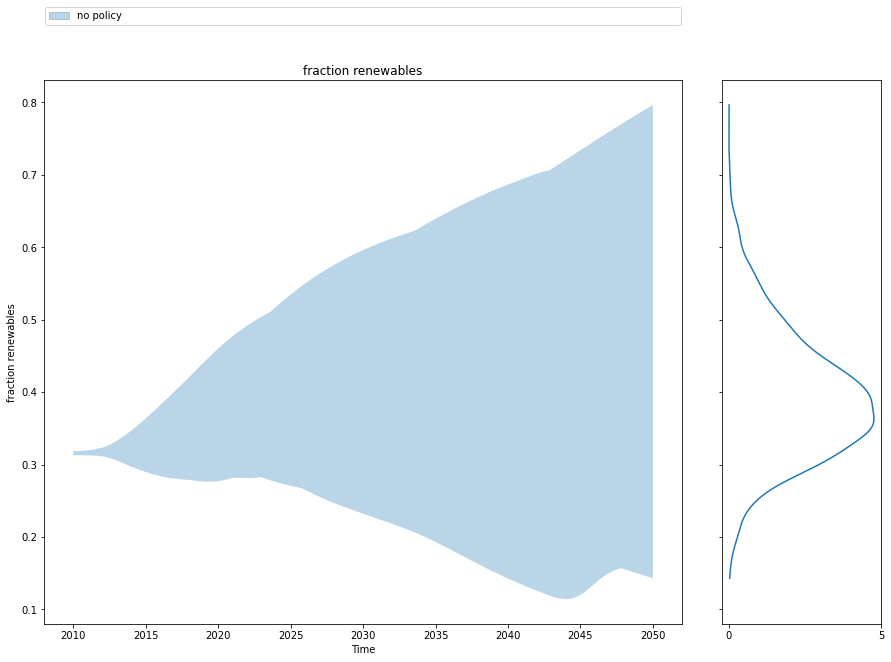

In [161]:
fig, ax=plotting.envelopes(x, outcomes, outcomes_to_show="fraction renewables", 
                      density=plotting_util.Density.KDE, group_by="policy",
                        fill=True)
fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

In [159]:
data = outcomes['fraction renewables']
# Cases where fraction renewables is lower in the end than at the start
y = data[:,0] > data[:,-1]

In [167]:
def classify(outcomes):
    #get the output for deceased population
    data = outcomes['fraction renewables']
    #make an empty array of length equal to number of cases
    classes = np.zeros(data.shape[0])
    # Cases where fraction renewables is lower in the end than at the start
    classes[data[:, -1] < data[:, 0]] = 1
    return classes

In [168]:
results = load_results(file)
prim_obj_orig = prim.setup_prim(results, classify, mass_min=0.05, threshold=0.1,
                            peel_alpha=0.05, obj_function=PRIMObjectiveFunctions.ORIGINAL)
prim_obj_leni1 = prim.setup_prim(results, classify, mass_min=0.05, threshold=0.1,
                            peel_alpha=0.05, obj_function=PRIMObjectiveFunctions.LENIENT1)
prim_obj_leni2 = prim.setup_prim(results, classify, mass_min=0.05, threshold=0.1,
                            peel_alpha=0.05, obj_function=PRIMObjectiveFunctions.LENIENT2)


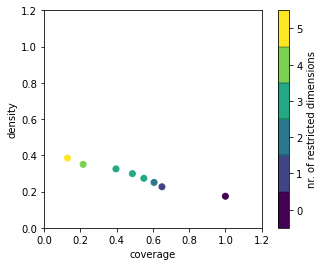

In [169]:
box_orig = prim_obj_orig.find_box()
box_orig.show_tradeoff()
plt.show()

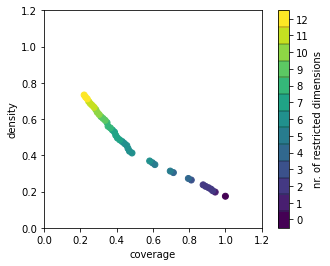

In [170]:
box_leni1 = prim_obj_leni1.find_box()
box_leni1.show_tradeoff()
plt.show()

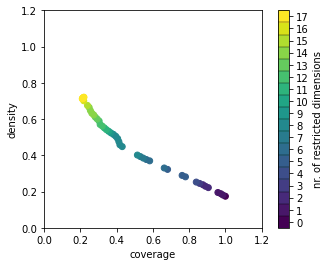

In [171]:
box_leni2 = prim_obj_leni2.find_box()
box_leni2.show_tradeoff()
plt.show()

## Even the lenient objective function do not reach a density of 0.8

In [146]:
# PCA
rotated_experiments, rotation_matrix = prim.pca_preprocess(x, y, exclude=['model', 'policy'])

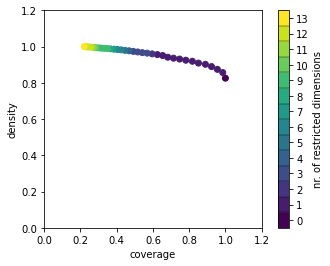

In [147]:
# Show PCA-PRIM results
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.8)
box = prim_obj.find_box()

box.show_tradeoff()
plt.show()

In [177]:
box.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.825800,0,1.0000,0.825800,0
1,0.985469,0.856632,1,0.9500,0.856632,1
2,0.955679,0.874557,2,0.9024,0.874557,1
3,0.923468,0.889641,3,0.8572,0.889641,1
4,0.889562,0.902235,4,0.8142,0.902235,1
5,0.851296,0.908973,5,0.7734,0.908973,1
6,0.817631,0.919140,6,0.7346,0.919140,1
7,0.781545,0.924907,7,0.6978,0.924907,1
8,0.747396,0.931201,8,0.6628,0.931201,1
9,0.713732,0.936150,9,0.6296,0.936150,1


## With PCA-PRIM the first box already has a density above 0.8